In [53]:
import os
import pandas as pd
import numpy as np

import torch
import torch.nn as nn
import torchshow as ts

from IPython.display import display, HTML
from itertools import product
from PIL import Image

torch.manual_seed(42)
if torch.cuda.is_available():
    print("Avaliable")
    torch.cuda.manual_seed_all(42)


Not


In [3]:
TFM_PATH = '~/PycharmProjects/TFM_SAI/'

In [7]:
data = {'col1': [1,2], 'col2': [3,4]}
df = pd.DataFrame(data)
df

,col1,col2
0,1,3
1,2,4


In [5]:
def load_image_casia_multi_spectral_palmprintV1(row):
    ruta_imagen = (
        TFM_PATH
        + f"datasets/CASIA-Multi-Spectral-PalmprintV1/{row['Usuario']}_{row['Mano']}_{row['Bandas']}_{row['Fotos']}.jpg"
    )
    imagen = Image.open(ruta_imagen)
    imagen_array = np.array(imagen)
    return imagen_array


def load_casia_multi_spectral_palmprintV1():
    usuarios = [f"{i:03}" for i in range(1, 101)]
    manos = ["l", "r"]
    bandas = [460, 630, 700, 850, 940, "WHT"]
    fotos = [f"{i:02}" for i in range(1, 7)]
    df = pd.DataFrame(
        product(usuarios, manos, bandas, fotos),
        columns=["Usuario", "Mano", "Bandas", "Fotos"],
    )

    df["Imagen"] = df.apply(lambda row: load_image_casia_multi_spectral_palmprintV1(row), axis=1)
    display(df.head())


load_casia_multi_spectral_palmprintV1()

FileNotFoundError: [Errno 2] No such file or directory: '~/PycharmProjects/TFM_SAI/datasets/CASIA-Multi-Spectral-PalmprintV1/001_l_460_01.jpg'

In [ ]:

def check_file_casia_palmprintV1(row):
    return os.path.exists(TFM_PATH + f"datasets/CASIA-PalmprintV1/{row['Usuario']}/{row['Usuario']}_{row['Mano']}_{row['Genero']}_{row['Foto']}.jpg"
    )
    

def load_image_casia_palmprintV1(row):
    ruta_imagen = TFM_PATH + f"datasets/CASIA-PalmprintV1/{row['Usuario']}/{row['Usuario']}_{row['Mano']}_{row['Genero']}_{row['Foto']}.jpg"
    imagen = Image.open(ruta_imagen)
    imagen_array = np.array(imagen)
    return imagen_array


def load_casia_palmprintV1():
    usuarios = [f"{i:04}" for i in range(1, 313)]
    genero = ["m", "f"]
    manos = ["l", "r"]
    fotos = [f"{i:02}" for i in range(1, 16)]
    # Crear el dataframe
    df = pd.DataFrame(
        product(usuarios, genero, manos, fotos),
        columns=["Usuario", "Mano", "Genero", "Foto"],
    )
    condition = df.apply(lambda row: check_file_casia_palmprintV1(row), axis=1)
    df = df[condition]

    df["Imagen"] = df.apply(lambda row: load_image_casia_palmprintV1(row), axis=1)
    display(df)

load_casia_palmprintV1()


In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

%matplotlib inline

img = Image.open(TFM_PATH + "datasets/CASIA-Multi-Spectral-PalmprintV1/001_l_460_01.jpg")
plt.imshow(img,cmap='jet')

In [ ]:
import torch
from torch import nn

m = nn.Bilinear(20, 30, 40)
input1 = torch.randn(128, 20)
input2 = torch.randn(128, 30)
output = m(input1, input2)
output

In [ ]:
import torch
import matplotlib.pyplot as plt
import numpy as np

# Crear un tensor
tensor = torch.tensor([[1, 2, 3], [4, 5, 6]])

# Convertir a NumPy
numpy_array = tensor.numpy()

# Visualizar usando Matplotlib
plt.imshow(numpy_array, cmap='viridis')
plt.colorbar()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
def show_images(images) -> None:
    n: int = len(images)
    f = plt.figure()
    for i in range(n):
        # Debug, plot figure
        f.add_subplot(1, n, i + 1)
        plt.title(images[i].get('title'))
        plt.imshow(images[i].get('data'))

    plt.show(block=True)


In [ ]:
import torch
from torch import nn

m = nn.Bilinear(20, 30, 40)
input1 = torch.randn(128, 20)
input2 = torch.randn(128, 30)
output = m(input1, input2)

out_img = output.detach().numpy()
out_img_arr = np.squeeze(out_img)

show_images(
    [
        {"title": "numpy", "data": out_img},
        {"title": "squeeze", "data": out_img_arr},
    ]
)

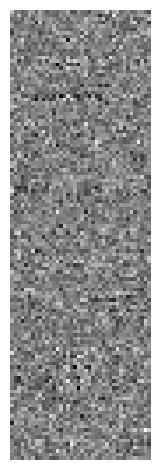

In [36]:
m = nn.Bilinear(20, 30, 40)
input1 = torch.randn(128, 20)
input2 = torch.randn(128, 30)
output = m(input1, input2)

ts.show(output)

In [ ]:
import torch
import torch.nn as nn

# Establecer la semilla para reproducibilidad
torch.manual_seed(42)

m = nn.Linear(20, 30)
print(m.extra_repr())
input = torch.randn(128, 20)
output = m(input)
output

in_features=20, out_features=30, bias=True


tensor([[-0.0812, -0.0047,  0.1155,  ...,  0.1756, -0.8380,  0.3319],
        [ 0.4620,  0.7383, -0.5019,  ...,  0.0920,  0.1710, -1.1859],
        [-0.4195,  0.8153,  0.1088,  ...,  0.6132, -0.9631, -0.3199],
        ...,
        [ 0.1045,  0.2180, -0.7313,  ..., -0.1838, -0.6767,  0.4313],
        [ 0.4861,  0.5294,  0.2851,  ...,  0.7837, -0.9578, -0.7541],
        [-1.1945,  0.2391,  0.4438,  ...,  0.3933, -0.0437,  0.4249]],
       grad_fn=<AddmmBackward0>)

torch.Size([1, 1, 12, 12])


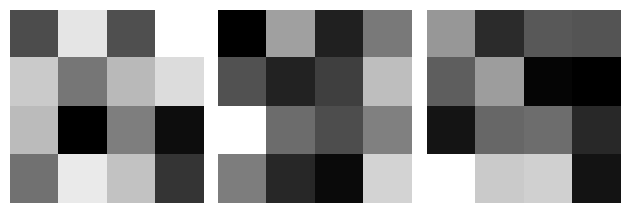

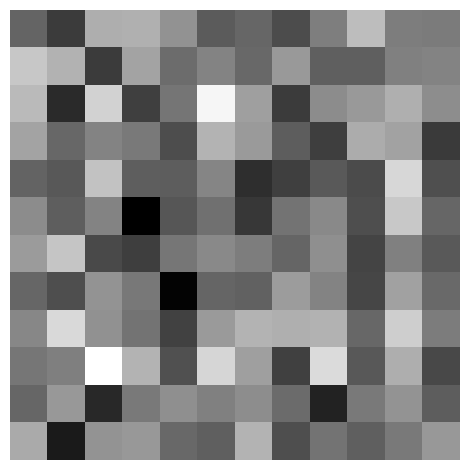

In [50]:
pixel_shuffle = nn.PixelShuffle(3)
# Ejemplo 1 imagen con 9 de 4 x 4 pixeles
input = torch.randn(1, 9, 4, 4) 
output = pixel_shuffle(input)
print(output.size())

ts.show([input[0][0], input[0][1], input[0][2]])
ts.show(output)